## Here we explore analytical and numerical solutions for linear ODEs.

Since the equations are linear, we can solve them analytically as well as numerically. <br />
The point then is to compare the different methods for doing so.<br />
By doing this we can therefore understand the accuracy of our numerical approximations.

# Analytical

For the analytical part, we could find the solution by hand (as I've already done).<br />
Here however, we will do so with help from Sympy - Python's scientific library for mathematics.<br />
This has the added benefit of writing our math out in LaTeX automatically.

In [1]:
#Set-up
import sympy

#This lets us print the math
sympy.init_printing()

#Initialize variables
beta, k, x_0, xdot_0, t = sympy.symbols('beta, k, x_0, xdot_0, t')
x = sympy.Function('x')

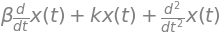

In [2]:
#Define the equation
eq = sympy.Derivative(x(t), t, 2) + beta * sympy.Derivative(x(t), t, 1) + k * x(t)
eq

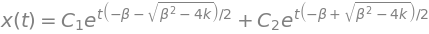

In [3]:
#Solve the ODE
sol = sympy.dsolve(eq)
sol

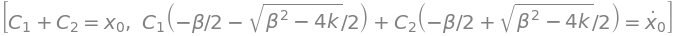

In [4]:
#Solve for constant relations (coupled equations)
const = [sympy.Eq(sol.args[1].subs(t, 0), x_0), sympy.Eq(sol.args[1].diff(t).subs(t, 0), xdot_0)]
const

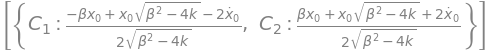

In [5]:
#Solve coupled equations for constants
sol_const = sympy.solve(const)
sol_const

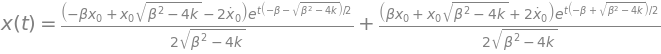

In [6]:
#Substitute constants into full solution
full_sol = sol.subs(sol_const[0])
full_sol

<br />
Now that we have our full equation, we proceed by choosing initial conditions for our variables. <br />
This grants us an analytical solution we can plot for all time t.
<br />

In [7]:
#Initial conditions
analytic = sympy.simplify(full_sol.subs({x_0:2, xdot_0:0, beta:1, k:2}))
analytic

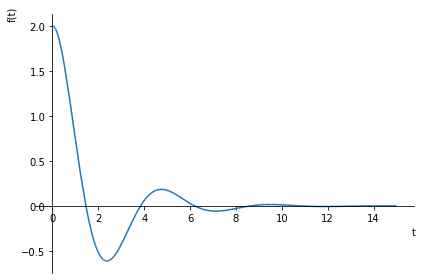

In [8]:
#Plot the solution
sympy.plot(analytic.rhs, (t, 0, 15))

<br />Here we have our first plotted result!<br/>
We can therefore move onto the numerical solutions, and use this analytical one as a comparison.
<br />

# Numerical

<br />
We would use Scipy's odeint (ODE integration) function, which itself uses multiple methods depending on the input (primarily it uses LSODE), yet since we want to try various methods, we will rely instead on Scipy's IVP (initial value problem) solver. This allows us to specify which method we're using.
<br />

In [9]:
#Set-up
import numpy as np
from scipy.integrate import solve_ivp, odeint
from matplotlib import pyplot as plt
import pylab

<br />
Below is our main function for the numerical analysis. <br />
It breaks the 2nd order into 2 first order equations.


In [10]:
def model(t, IC, b, k):
    #dependent vars and their initial states
    x, xdot = IC
    #coupled equations as array [z][zdot], where z = xdot
    z = [[],[]]
    z[0] = xdot
    z[1] = - b*xdot - k*x
    #return array
    return z

<p style="text-align: center">
Now that we have our model function, we can start to call the numerical methods. <br />
First we set our initial conditions, then we call an assortment of different methods.
</p>

In [11]:
#Initial conditions
beta = 1
k = 2
x_0 = 2
x_0dot = 0

#Method calls
LSODA = solve_ivp(model, [0, 20], [x_0, x_0dot], args=(beta, k), method='LSODA', dense_output=True)
RK45 = solve_ivp(model, [0, 20], [x_0, x_0dot], args=(beta, k), method='RK45', dense_output=True)
BDF = solve_ivp(model, [0, 20], [x_0, x_0dot], args=(beta, k), method='BDF', dense_output=True)

<br />
Now that we have called the different methods without error, and stored their data in corresponding variables, we can plot them together and see if there's any difference.
<br />

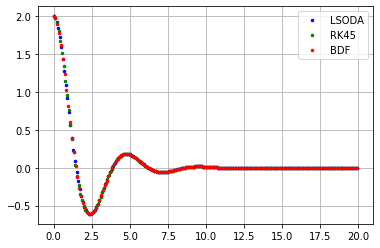

In [12]:
#Time as array
time = np.arange(0, 20.0, 0.01)

#Initialize subplots for plotting analytical vs numerical
z1 = LSODA.sol(time)
z2 = RK45.sol(time)
z3 = BDF.sol(time)

#Construct plot - they are marked at different intervals so not to overlap
fig, ax = pylab.subplots()
ax.plot(time, z1[0].T, '.', ms=5, color='b', markevery=10, label='LSODA')
ax.plot(time, z2[0].T, '.', ms=5, color='g', markevery=11, label='RK45')
ax.plot(time, z3[0].T, '.', ms=5, color='r', markevery=12, label='BDF')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

<br />
We see they compare almost exactly - certainly enough for our pixel resolution. <br />

# Analytical vs Numerical

<br />
Finally we can plot any of these numerical solutions against our analytical one from before.
<br />

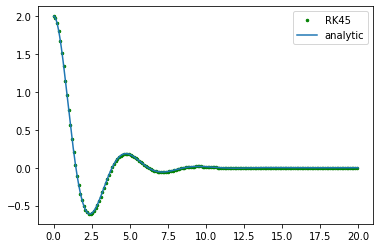

In [13]:
fig, ax = pylab.subplots()
ax.plot(time, z2[0].T, '.', ms=5, color='g', markevery=11, label='RK45')
ax.plot(time, np.real(sympy.lambdify(t, analytic.rhs, 'numpy')(time)), label='analytic')
plt.legend(loc='upper right');
plt.grid=True
plt.show()

All in all we see very strong agreement, which gives us good faith in these algorithms. 
The next thing we should do is move onto nonlinear equations - the domain these numerical methods were made for.